In [42]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Using get dummies to classify states

- Doesn't work as expected

In [43]:
#Import data as dataframe
renewable_df = pd.read_csv("../export_data/../export_data/renewable_totals.csv")
renewable_df = pd.get_dummies(renewable_df)
renewable_df.head(2)

,Renewable,Electricity_Production_GJ,Electricity_Production_MWh,Year,State_ACT,State_NSW,State_NT,State_QLD,State_SA,State_TAS,State_VIC,State_WA
0,4.0,353180.0,98106.0,2015,1,0,0,0,0,0,0,0
1,38.0,18196617.0,5054615.0,2015,0,1,0,0,0,0,0,0


In [44]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = renewable_df[['Electricity_Production_GJ', 'State_ACT', 'State_NSW', 'State_NT', 'State_QLD', 'State_SA', 'State_TAS', 'State_VIC', 'State_WA']]
y = renewable_df['Year'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (24, 9) (24, 1)


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Tried using scaled data to improve training and testing scores - also did not work 

In [ ]:
from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [ ]:
# # Transform the training and testing data using the X_scaler and y_scaler models

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [46]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [47]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5232178291185658
Testing Score: -0.25422243078874107


In [ ]:
# Fit the model to the training data and calculate the scores for the training and testing data

# model.fit(X_train_scaled, y_train_scaled)
# training_score = model.score(X_train_scaled, y_train_scaled)
# testing_score = model.score(X_test_scaled, y_test_scaled)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

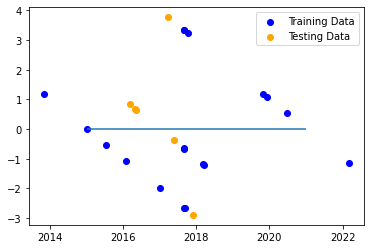

In [48]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)

# # Plot Residuals
plt.scatter(model.predict(X_train), y_train- model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())

In [ ]:
# predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)

# # # Plot Residuals
# plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())


In [49]:
# Used X_test, y_test, and model.predict(X_test) to calculate 
# Mean Squared Error and R2 values

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4.0413833880970556, R2: -0.25422243078874107


Used Lasso, Ridge and Elastic Net models to test MSE and R2 values

In [ ]:
# LASSO model
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

## Filtered electricity production dataframe to one state
With the intention of building one model per state to predict future energy production however the data is too small for the models to hold any real meaning

In [50]:
renewable_act = pd.read_csv("../export_data/renewable_totals.csv")
renewable_act = renewable_act.loc[renewable_act['State'] == 'ACT']
renewable_act

,State,Renewable,Electricity_Production_GJ,Electricity_Production_MWh,Year
0,ACT,4.0,353180.0,98106.0,2015
8,ACT,3.0,262812.0,73003.0,2017
16,ACT,5.0,324911.0,90253.0,2021


In [51]:
X = renewable_act['Electricity_Production_GJ'].values.reshape(-1, 1)
y = renewable_act['Year'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (3, 1) (3, 1)


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: nan


/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


## Renewables share data

- Found new data on the share of renewables in the total energy consumption in Australia. 
- Data in petajoules 1960-2020
- Found that the data was not linear and did not work with basic linear regressions, so tried two different methods for using the polynomial form of the data

In [55]:
renewable_share = pd.read_csv("../data/renewable_share.csv")
renewable_share.rename(columns={'Renewables share': 'Renewable_Share'}, inplace=True)

renewable_share.dtypes


Year                 int64
Renewable_Share    float64
dtype: object

In [56]:
X = renewable_share['Renewable_Share'].values.reshape(-1, 1)
y = renewable_share['Year'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (61, 1) (61, 1)


In [57]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X)

model = LinearRegression()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_X, y)

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.564323147691119
Testing Score: -0.439527655457818


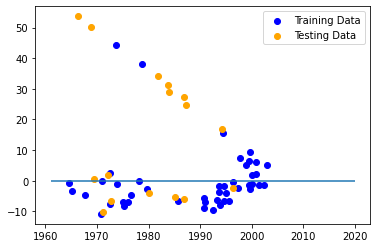

In [59]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)

# # Plot Residuals
plt.scatter(model.predict(X_train), y_train- model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())

### RENEWABLE SHARE USING SVM KERNEL POLY

In [60]:
X = renewable_share['Renewable_Share'].values.reshape(-1, 1)
y = renewable_share['Year']

print("Shape: ", X.shape, y.shape)

Shape:  (61, 1) (61,)


In [61]:
from sklearn import svm

svm_model = svm.SVR(kernel='poly')
svm_model.fit(X, y)
print(svm_model.predict(X_test))

ValueError: X.shape[1] = 3 should be equal to 1, the number of features at training time

## Energy consumption in petajoules of coal, gas, oil and renewables 1974 - 2019

- This data returns the most accurate training and testing scores
- Need to work out how to add prediction data for years we want to predict

In [62]:
energy_consumption = pd.read_csv("../data/energy_consumption_fueltype.csv")
energy_consumption.replace(' ','', regex=True, inplace=True)
energy_consumption.head()

,Year,Coal,Oil,Gas,Renewables
0,1974,981.1,1327.7,189.2,204.0
1,1975,981.2,1339.7,211.2,206.2
2,1976,1047.7,1410.6,256.2,199.3
3,1977,1070.4,1438.3,283.0,201.2
4,1978,1103.0,1440.9,314.9,199.6


In [63]:
energy_consumption['Coal'] = pd.to_numeric(energy_consumption['Coal'])
energy_consumption['Oil'] = pd.to_numeric(energy_consumption['Oil'])
energy_consumption['Gas'] = pd.to_numeric(energy_consumption['Gas'])

energy_consumption.dtypes

Year            int64
Coal          float64
Oil           float64
Gas           float64
Renewables    float64
dtype: object

In [64]:
X = energy_consumption[['Coal', 'Oil', 'Gas', 'Renewables']]
y = energy_consumption['Year'].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (46, 4) (46, 1)


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9977754043670622
Testing Score: 0.998638334936979


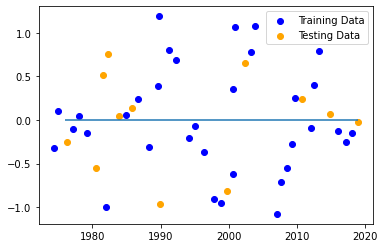

In [66]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)

# # Plot Residuals
plt.scatter(model.predict(X_train), y_train- model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())

In [67]:
# Used X_test, y_test, and model.predict(X_test) to calculate 
# Mean Squared Error and R2 values

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2762950796973085, R2: 0.998638334936979
